___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Loading data and EDA

In [2]:
df = pd.read_csv("cement_slump.csv")
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [4]:
df.describe().T
#std si mean den küçük olan değer yok. yani outlier yok diyebiliriz..

,count,mean,std,min,25%,50%,75%,max
Cement,103.0,229.894175,78.877230,137.00,152.00,248.00,303.900,374.00
Slag,103.0,77.973786,60.461363,0.00,0.05,100.00,125.000,193.00
Fly ash,103.0,149.014563,85.418080,0.00,115.50,164.00,235.950,260.00
Water,103.0,197.167961,20.208158,160.00,180.00,196.00,209.500,240.00
SP,103.0,8.539806,2.807530,4.40,6.00,8.00,10.000,19.00
Coarse Aggr.,103.0,883.978641,88.391393,708.00,819.50,879.00,952.800,1049.90
Fine Aggr.,103.0,739.604854,63.342117,640.60,684.50,742.70,788.000,902.00
SLUMP(cm),103.0,18.048544,8.750844,0.00,14.50,21.50,24.000,29.00
FLOW(cm),103.0,49.610680,17.568610,20.00,38.50,54.00,63.750,78.00
Compressive Strength (28-day)(Mpa),103.0,36.038738,7.837120,17.19,30.90,35.52,41.205,58.53


In [5]:
df.corr()['Compressive Strength (28-day)(Mpa)'].sort_values(ascending=False)[1:]

Cement          0.445656
Fly ash         0.444380
SP             -0.037909
FLOW(cm)       -0.124189
Fine Aggr.     -0.154532
Coarse Aggr.   -0.160610
SLUMP(cm)      -0.223499
Water          -0.254320
Slag           -0.331522
Name: Compressive Strength (28-day)(Mpa), dtype: float64

## Graphical analysis

<AxesSubplot:>

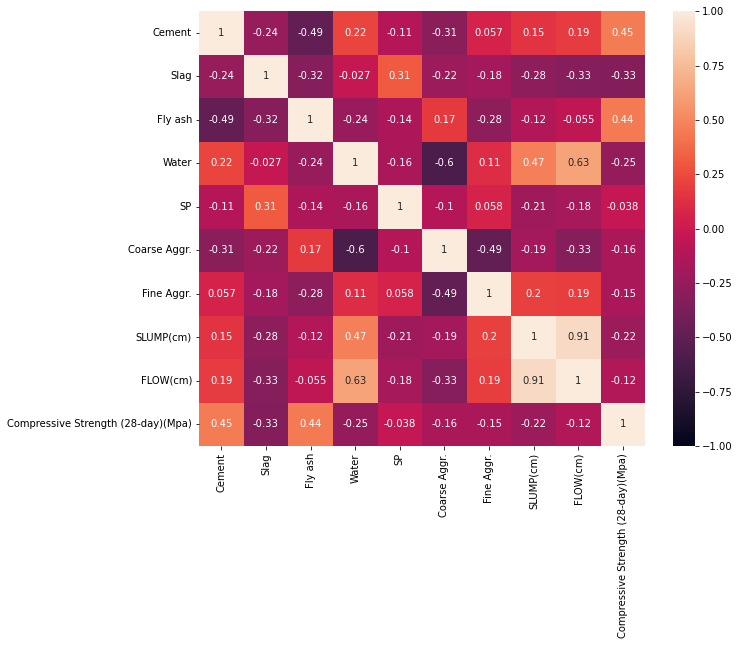

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1)
#slump ile flow arasında 0.91 oranında yüksek correlassion var. yani multicolinearity var diyebiliriz

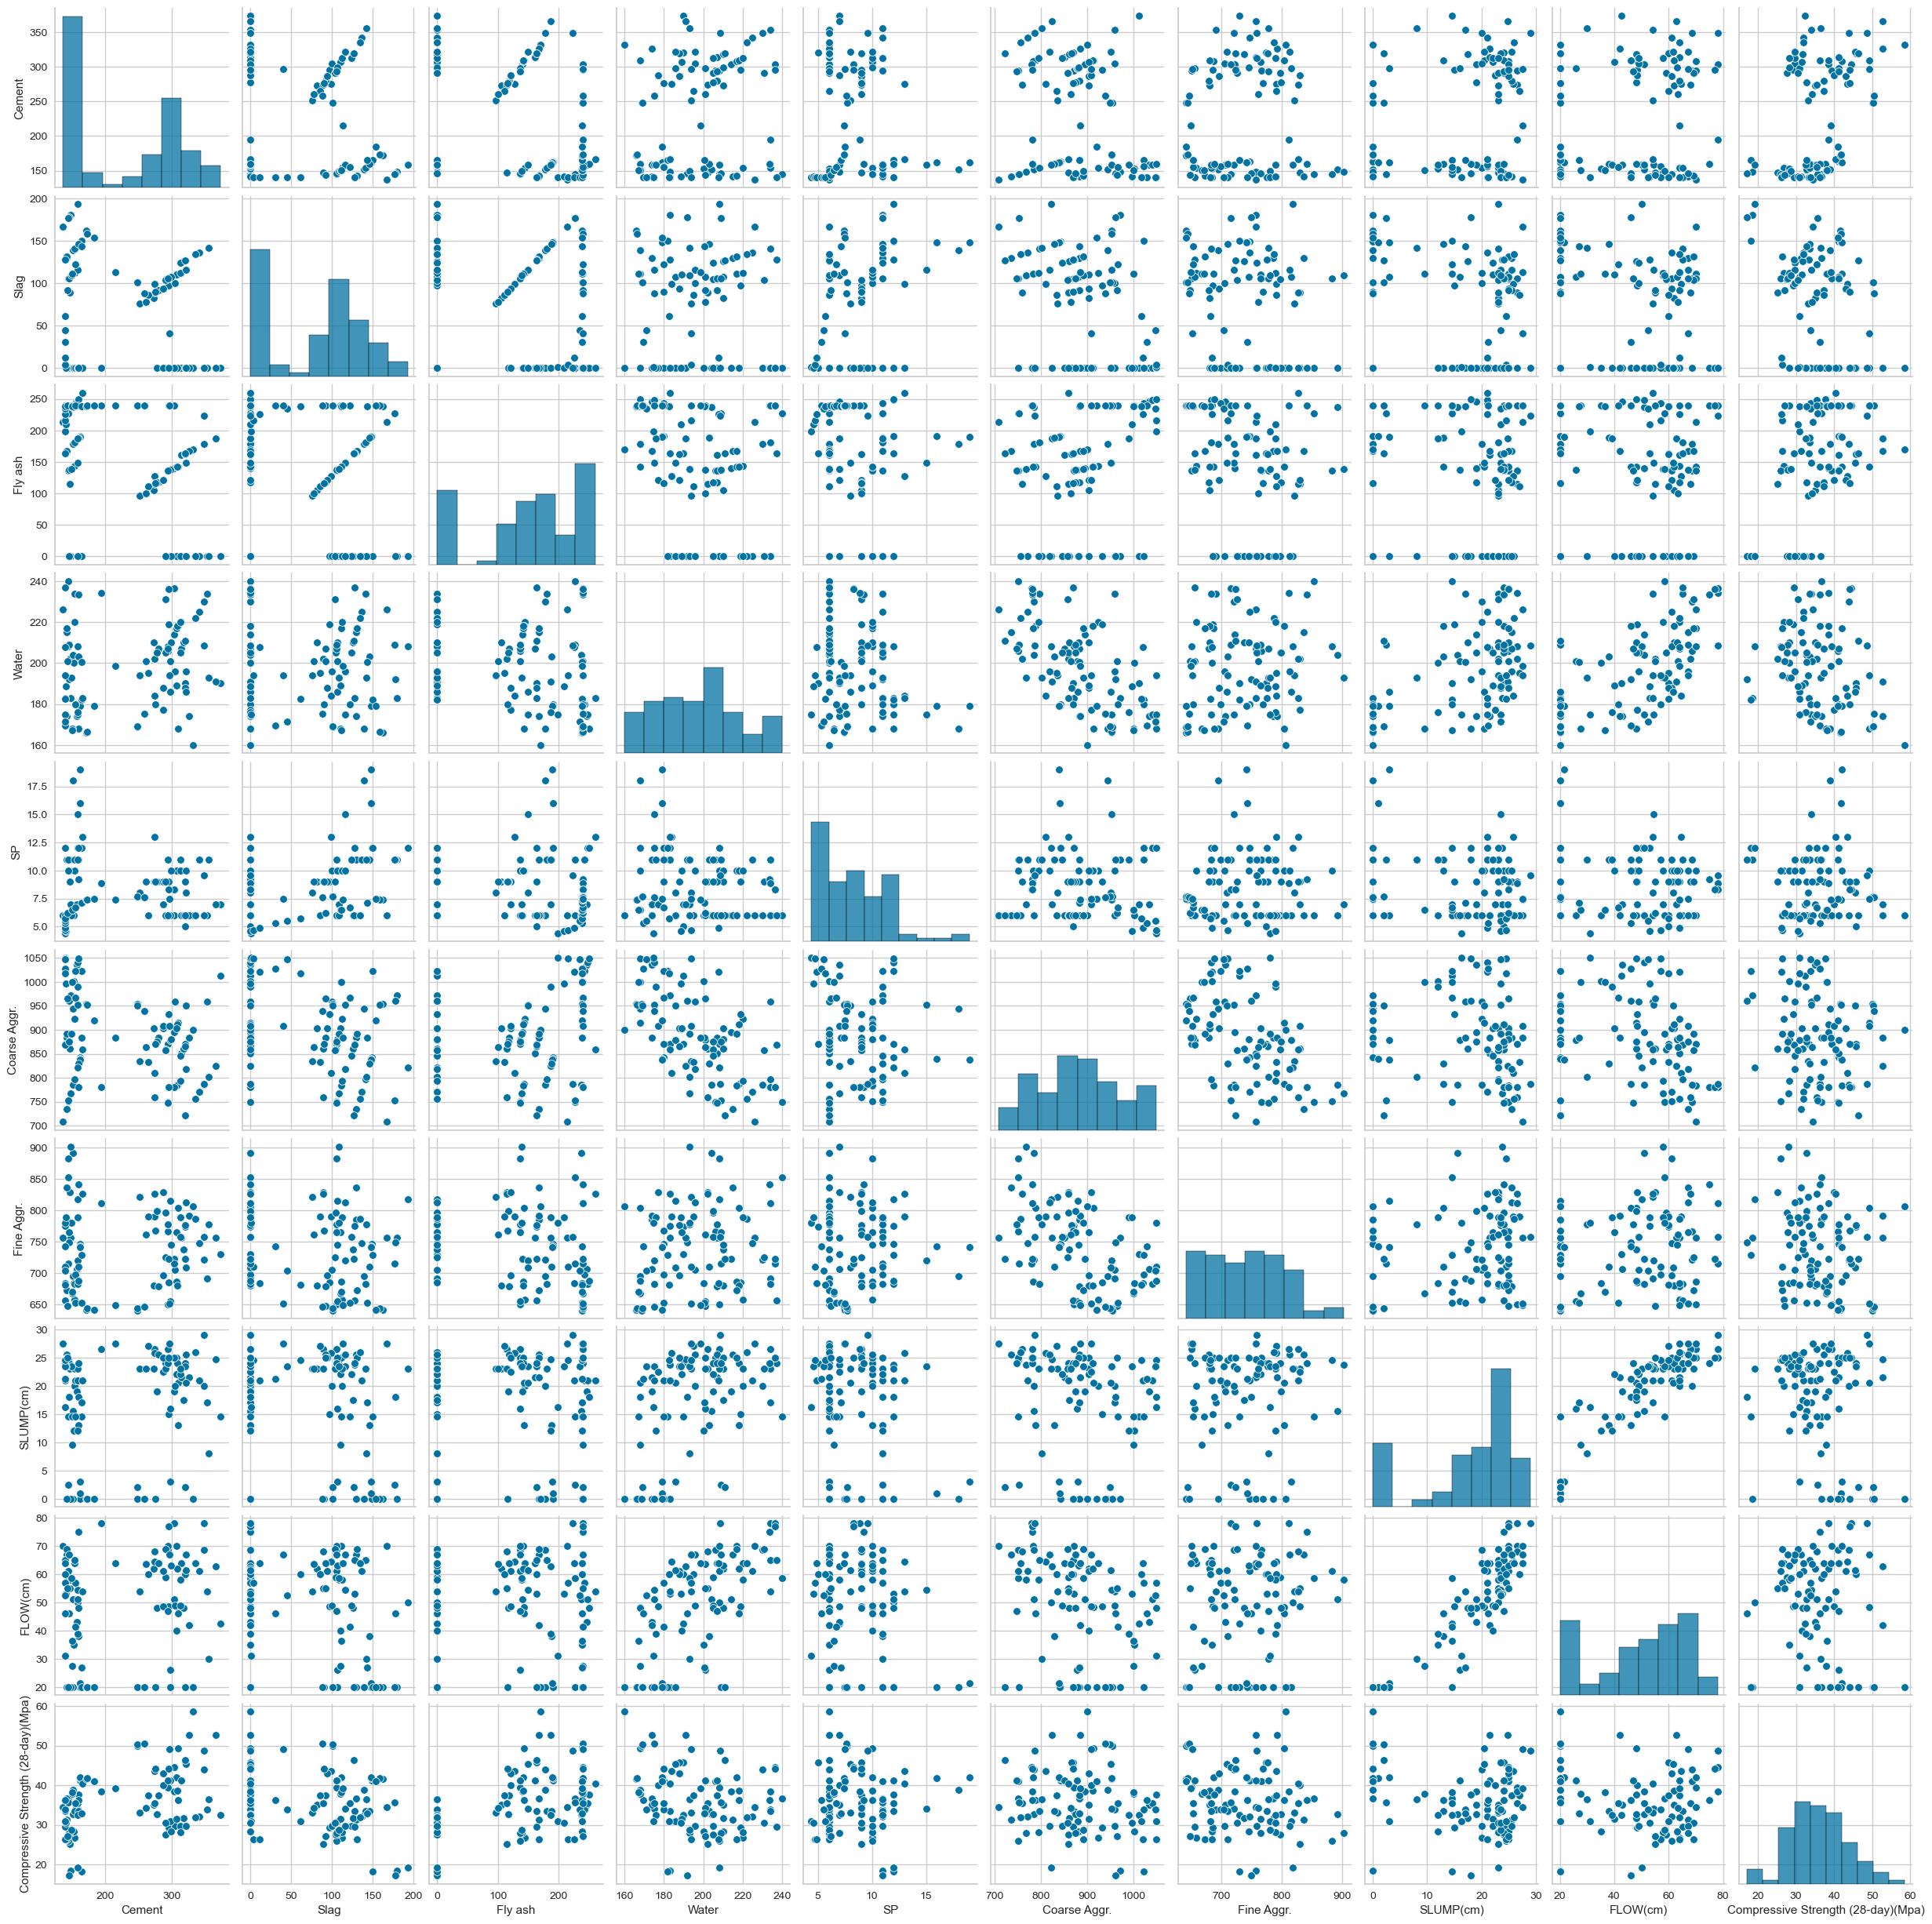

In [242]:
sns.pairplot(df);

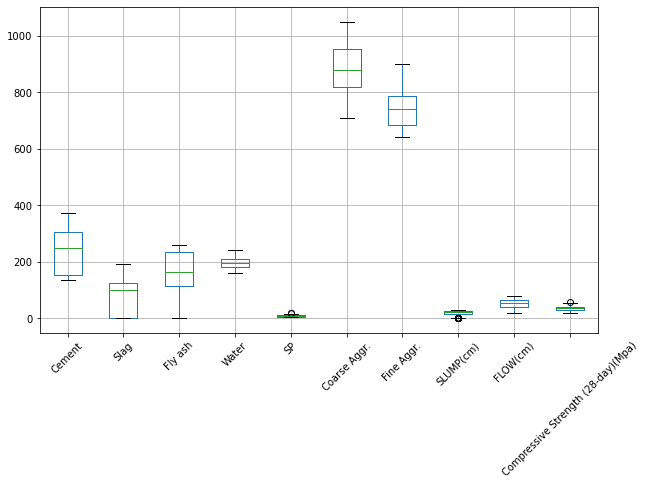

In [7]:
plt.figure(figsize =(10,6))
df.boxplot()
plt.xticks(rotation=45);

### Train | Test Split

In [8]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis =1)
y = df["Compressive Strength (28-day)(Mpa)"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Scaling the Data

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [12]:
scaler = StandardScaler() # will be used in pipeline later

In [13]:
# if you don't use pipeline, you can use scaler directly

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [ ]:
#WHY PİPELİNE..
#https://medium.com/analytics-vidhya/what-is-a-pipeline-anyways-e6a814d4888

In [14]:
from sklearn.pipeline import Pipeline # pipeline is used to combine scaler and model

In [15]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() # will be used in pipeline later

In [16]:
pipe_lm = Pipeline([("scaler", scaler), ("lm", lm)]) # pipeline is used to combine scaler and model

In [17]:
pipe_lm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [18]:
y_pred = pipe_lm.predict(X_test) # predict on test data
y_train_pred = pipe_lm.predict(X_train) # predict on train data

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [20]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") # train and test scores
ls

,linear_train,linear_test
R2,0.907145,0.911967
mae,1.936263,1.740383
mse,5.874313,4.454237
rmse,2.423698,2.110506


## Cross Validate

In [21]:
#from sklearn.metrics import SCORERS
#list(SCORERS.keys())

In [22]:
from sklearn.model_selection import cross_validate, cross_val_score

In [23]:
model = Pipeline([("scaler", scaler), ("lm", lm)])
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [24]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002454,0.002003,0.942208,-1.908524,-4.645188,-2.155270
2,0.002609,0.001022,0.706629,-2.647319,-10.756658,-3.279734
3,0.002561,0.001009,0.865934,-1.482831,-3.725762,-1.930223
4,0.002006,0.002004,0.923166,-2.244108,-8.434009,-2.904137
5,0.001850,0.001003,0.792889,-2.867905,-11.698265,-3.420273


In [25]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

# cross_validation is done to verify whether the one-time score from test set is consistent
# train score and cross validation score are compared and overfitting is decided

test_r2                             0.846165
test_neg_mean_absolute_error       -2.230137
test_neg_mean_squared_error        -7.851977
test_neg_root_mean_squared_error   -2.737927
dtype: float64

In [26]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.907145,0.911967
mae,1.936263,1.740383
mse,5.874313,4.454237
rmse,2.423698,2.110506


In [27]:
# Compare errors as a percentage of target mean value

print("train RMSE:", 2.423698/df["Compressive Strength (28-day)(Mpa)"].mean())
print("CV RMSE:", 2.737927/df["Compressive Strength (28-day)(Mpa)"].mean())

train RMSE: 0.06725257718905493
CV RMSE: 0.07597177821060941


In [28]:
pipe_lm["lm"].coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

In [29]:
lm_df = pd.DataFrame(pipe_lm["lm"].coef_, index=X_train.columns, columns = ["lm_coef"])
lm_df

,lm_coef
Cement,4.280152
Slag,-2.222880
Fly ash,3.932020
Water,-4.770839
SP,0.121100
Coarse Aggr.,-5.277291
Fine Aggr.,-2.611313
SLUMP(cm),-2.188378
FLOW(cm),1.465706


## Ridge Regression

In [30]:
from sklearn.linear_model import Ridge

# Variance between train and test scores is reduced by adding bias to the model with Ridge
# Regularization increases as alpha increases

In [31]:
ridge_model = Ridge(alpha=1, random_state=42) # will be used in pipeline later

# big alpha means bir bias(error), i.e. big regularization 

In [32]:
pipe_ridge = Pipeline([("scaler", scaler), ("ridge", ridge_model)]) # pipeline is used to combine scaler and model

In [33]:
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=1, random_state=42))])

In [34]:
y_pred = pipe_ridge.predict(X_test)
y_train_pred = pipe_ridge.predict(X_train)

In [35]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.906392,0.911204
mae,1.938096,1.732472
mse,5.921967,4.492822
rmse,2.433509,2.119628


In [36]:
pd.concat([ls, rs], axis=1)  # combine train and test scores to compare

,linear_train,linear_test,ridge_train,ridge_test
R2,0.907145,0.911967,0.906392,0.911204
mae,1.936263,1.740383,1.938096,1.732472
mse,5.874313,4.454237,5.921967,4.492822
rmse,2.423698,2.110506,2.433509,2.119628


## For Ridge Regression CV with alpha : 1 

In [37]:
model = Pipeline([("scaler", scaler), ("ridge", ridge_model)])
scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [38]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002001,0.001001,0.945011,-1.837154,-4.419908,-2.102358
2,0.002000,0.000505,0.708681,-2.651491,-10.681426,-3.268245
3,0.000999,0.003001,0.870580,-1.487804,-3.596664,-1.896487
4,0.002999,0.001002,0.920645,-2.255780,-8.710815,-2.951409
5,0.001513,0.001000,0.804676,-2.793295,-11.032516,-3.321523


In [39]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.849918
test_neg_mean_absolute_error       -2.205105
test_neg_mean_squared_error        -7.688266
test_neg_root_mean_squared_error   -2.708004
dtype: float64

In [40]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.906392,0.911204
mae,1.938096,1.732472
mse,5.921967,4.492822
rmse,2.433509,2.119628


In [41]:
pipe_ridge["ridge"].coef_

array([ 5.01092233, -1.37765187,  4.8062743 , -3.90644878,  0.26138511,
       -4.06644253, -1.74660531, -1.95498663,  1.13349998])

In [42]:
rm_df = pd.DataFrame(pipe_ridge["ridge"].coef_, index= X_train.columns, columns = ["ridge_coef_1"])

In [43]:
pd.concat([lm_df,rm_df], axis = 1)

# features with large coefficients can be called important features and features with small coefficients can be called insignificant features
# ridge model groups the features as important an unimportant features
#en önemli feature değişti

,lm_coef,ridge_coef_1
Cement,4.280152,5.010922
Slag,-2.222880,-1.377652
Fly ash,3.932020,4.806274
Water,-4.770839,-3.906449
SP,0.121100,0.261385
Coarse Aggr.,-5.277291,-4.066443
Fine Aggr.,-2.611313,-1.746605
SLUMP(cm),-2.188378,-1.954987
FLOW(cm),1.465706,1.133500


## Choosing best alpha value with Cross-Validation

In [44]:
from sklearn.linear_model import RidgeCV

In [45]:
#ekleyeceğimiz optimal hatayı belirlemek için alpha değeri önemli..
alpha_space = np.linspace(0.1, 1, 100)
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [46]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring= "neg_root_mean_squared_error") # will be used in pipeline later

In [47]:
pipe_ridgecv = Pipeline([("scaler", scaler), ("ridgecv", ridge_cv_model)]) # pipeline is used to combine scaler and model

In [48]:
pipe_ridgecv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, scoring='neg_root_mean_squared_error'))])

In [49]:
pipe_ridgecv["ridgecv"].alpha_

0.9181818181818181

In [50]:
# Ridge( alpha = 0.91)
y_pred = pipe_ridgecv.predict(X_test)
y_train_pred = pipe_ridgecv.predict(X_train)  

In [51]:
# Ridge Grid Model Scores

rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv") 
rcs

,ridge_cv_train,ridge_cv_test
R2,0.906476,0.911355
mae,1.937773,1.732412
mse,5.916637,4.485191
rmse,2.432414,2.117827


In [52]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827


In [53]:
pipe_ridgecv["ridgecv"].coef_

array([ 5.00521265, -1.38945391,  4.79652108, -3.93170693,  0.25805802,
       -4.09232266, -1.76329842, -1.96996865,  1.15500214])

In [54]:
rcm_df = pd.DataFrame(pipe_ridgecv["ridgecv"].coef_, index= X_train.columns, columns=["ridge_cv_coef_0.91"])

In [55]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1) 

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91
Cement,4.280152,5.010922,5.005213
Slag,-2.222880,-1.377652,-1.389454
Fly ash,3.932020,4.806274,4.796521
Water,-4.770839,-3.906449,-3.931707
SP,0.121100,0.261385,0.258058
Coarse Aggr.,-5.277291,-4.066443,-4.092323
Fine Aggr.,-2.611313,-1.746605,-1.763298
SLUMP(cm),-2.188378,-1.954987,-1.969969
FLOW(cm),1.465706,1.133500,1.155002


## LASSO

In [56]:
from sklearn.linear_model import Lasso, LassoCV
#lasso da katsayıların mutlak değerinin toplamını lambda ile çarparak hata ekliyor..

In [57]:
lasso_model = Lasso(alpha=1, random_state=42)

In [58]:
pipe_lasso = Pipeline([("scaler", scaler), ("lasso", lasso_model)]) # pipeline is used to combine scaler and model

In [59]:
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=42))])

In [60]:
y_pred = pipe_lasso.predict(X_test)
y_train_pred = pipe_lasso.predict(X_train)

In [61]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso") 

lss

# Compared to the ridge model, it looks underfitting
# the scores can be improved by the fine tuning

,lasso_train,lasso_test
R2,0.776425,0.801642
mae,2.959616,2.466012
mse,14.144056,10.036383
rmse,3.760858,3.168025


In [62]:
pd.concat([ls, rs, rcs, lss], axis = 1)
#

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025


## For Lasso CV with Default Alpha : 1

In [63]:
model = Pipeline([("scaler", scaler), ("lasso", lasso_model)])
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [64]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002972,0.001041,0.826285,-3.154233,-13.962787,-3.736681
2,0.001504,0.001503,0.499657,-3.387816,-18.345441,-4.283158
3,0.001905,0.002000,0.676319,-2.382057,-8.995287,-2.999214
4,0.002002,0.001005,0.681643,-4.372939,-34.945941,-5.911509
5,0.001005,0.001505,0.736091,-3.244457,-14.906371,-3.860877


In [65]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.683999
test_neg_mean_absolute_error        -3.308301
test_neg_mean_squared_error        -18.231165
test_neg_root_mean_squared_error    -4.158288
dtype: float64

In [66]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.776425,0.801642
mae,2.959616,2.466012
mse,14.144056,10.036383
rmse,3.760858,3.168025


In [67]:
model["lasso"].coef_
#9 featuredan 4 ünü kesip attı..5 feature ile predict yaptı..

array([ 4.82131411, -0.        ,  4.88005283, -0.81976891,  0.        ,
       -0.35149513, -0.        , -0.71063068, -0.        ])

In [68]:
lsm_df = pd.DataFrame(model["lasso"].coef_, index= X_train.columns, columns = ["lasso_coef_1"])

In [69]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1) 

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1
Cement,4.280152,5.010922,5.005213,4.821314
Slag,-2.222880,-1.377652,-1.389454,-0.000000
Fly ash,3.932020,4.806274,4.796521,4.880053
Water,-4.770839,-3.906449,-3.931707,-0.819769
SP,0.121100,0.261385,0.258058,0.000000
Coarse Aggr.,-5.277291,-4.066443,-4.092323,-0.351495
Fine Aggr.,-2.611313,-1.746605,-1.763298,-0.000000
SLUMP(cm),-2.188378,-1.954987,-1.969969,-0.710631
FLOW(cm),1.465706,1.133500,1.155002,-0.000000


### Choosing best alpha value with Cross-Validation

In [70]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=100000, random_state=42) # will be used in pipeline later

# With the default value of max_iter, sometimes GD can't oconvergence to the minimum and an error arises.
# In such cases, it is necessary to increase the max_iter value.

In [71]:
pipe_lassocv = Pipeline([("scaler", scaler), ("lassocv", lasso_cv_model)]) # pipeline is used to combine scaler and model

In [72]:
pipe_lassocv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, max_iter=100000, random_state=42))])

In [73]:
pipe_lassocv["lassocv"].alpha_

0.1

In [74]:
# Lasso(alpha =0.1)

y_pred = pipe_lassocv.predict(X_test)   
y_train_pred = pipe_lassocv.predict(X_train)

In [75]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.900491,0.907944
mae,1.966753,1.766723
mse,6.295287,4.657759
rmse,2.509041,2.158184


In [76]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184


In [77]:
pipe_lassocv["lassocv"].coef_

array([ 6.36058116,  0.        ,  6.44860782, -2.38557078,  0.46733827,
       -2.09003844, -0.22823288, -1.08177398,  0.        ])

In [78]:
lcm_df = pd.DataFrame(pipe_lassocv["lassocv"].coef_, index= X_train.columns, columns = ["lasso_cv_coef_0.1"])

In [79]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1) # (7 fearures ile) test_r2 = 0.90

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1,lasso_cv_coef_0.1
Cement,4.280152,5.010922,5.005213,4.821314,6.360581
Slag,-2.222880,-1.377652,-1.389454,-0.000000,0.000000
Fly ash,3.932020,4.806274,4.796521,4.880053,6.448608
Water,-4.770839,-3.906449,-3.931707,-0.819769,-2.385571
SP,0.121100,0.261385,0.258058,0.000000,0.467338
Coarse Aggr.,-5.277291,-4.066443,-4.092323,-0.351495,-2.090038
Fine Aggr.,-2.611313,-1.746605,-1.763298,-0.000000,-0.228233
SLUMP(cm),-2.188378,-1.954987,-1.969969,-0.710631,-1.081774
FLOW(cm),1.465706,1.133500,1.155002,-0.000000,0.000000


## Elastic net

In [80]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [81]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # l1_ratio is used to control the amount of L1 and L2 regularization

In [82]:
pipe_elastic = Pipeline([("scaler", scaler), ("elastic", elastic_model)]) # pipeline is used to combine scaler and model

In [83]:

pipe_elastic.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=42))])

In [84]:
y_pred = pipe_elastic.predict(X_test)
y_train_pred = pipe_elastic.predict(X_train)

In [86]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es
#underfitting...

,elastic_train,elastic_test
R2,0.636729,0.635031
mae,3.802838,3.555946
mse,22.981720,18.466419
rmse,4.793925,4.297257


In [87]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944,0.636729,0.635031
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723,3.802838,3.555946
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759,22.981720,18.466419
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184,4.793925,4.297257


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [88]:
model = Pipeline([("scaler", scaler), ("elastic", ElasticNet(alpha=1, l1_ratio=0.5, random_state=42))])

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [89]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.559420,-4.933674,-35.412716,-5.950858
2,0.466474,-3.311646,-19.562145,-4.422911
3,0.537252,-3.036801,-12.860032,-3.586089
4,0.540848,-5.517945,-50.401042,-7.099369
5,0.625048,-4.116153,-21.178438,-4.602004


In [90]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.545808
test_neg_mean_absolute_error        -4.183244
test_neg_mean_squared_error        -27.882875
test_neg_root_mean_squared_error    -5.132246
dtype: float64

In [91]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.636729,0.635031
mae,3.802838,3.555946
mse,22.981720,18.466419
rmse,4.793925,4.297257


In [92]:
pipe_elastic["elastic"].coef_

array([ 2.61657059, -0.73015253,  2.67139945, -1.20195947,  0.        ,
       -1.16386814, -0.32234008, -0.82569551, -0.        ])

In [93]:
em_df = pd.DataFrame(pipe_elastic["elastic"].coef_, index= X_train.columns, columns=["elastic_coef_(alp:1, L1:0.5)"])

In [94]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1,lasso_cv_coef_0.1,"elastic_coef_(alp:1, L1:0.5)"
Cement,4.280152,5.010922,5.005213,4.821314,6.360581,2.616571
Slag,-2.222880,-1.377652,-1.389454,-0.000000,0.000000,-0.730153
Fly ash,3.932020,4.806274,4.796521,4.880053,6.448608,2.671399
Water,-4.770839,-3.906449,-3.931707,-0.819769,-2.385571,-1.201959
SP,0.121100,0.261385,0.258058,0.000000,0.467338,0.000000
Coarse Aggr.,-5.277291,-4.066443,-4.092323,-0.351495,-2.090038,-1.163868
Fine Aggr.,-2.611313,-1.746605,-1.763298,-0.000000,-0.228233,-0.322340
SLUMP(cm),-2.188378,-1.954987,-1.969969,-0.710631,-1.081774,-0.825696
FLOW(cm),1.465706,1.133500,1.155002,-0.000000,0.000000,-0.000000


## Grid Search for ElasticNet


In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
elastic_model = ElasticNet(max_iter=10000, random_state=42) 

In [97]:
pipe_elastic = Pipeline([("scaler", scaler), ("elastic", elastic_model)]) # pipeline is used to combine scaler and model

In [98]:
param_grid = {"elastic__alpha":alpha_space,
            "elastic__l1_ratio":[0.1, 0.5, 0.7,0.9, 0.95, 1]}

In [99]:
grid_model = GridSearchCV(estimator = pipe_elastic, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)
# bu kadar büyük bir deneme yapmıyoruz normalde..

In [100]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elast

[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ra

[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic_

[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545

[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364

[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.18181818181818182

[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.190909090909

[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l

[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727

[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.24545454545454545, elastic__l

[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, e

[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l

[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2909090909090909, elastic__l

[CV] END ............elastic__alpha=0.3, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.3, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.3, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.3, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.3, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.3, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.3, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.3, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END

[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic_

[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636

[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.3545454545454545, elastic__l

[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3727272727272727, elastic__l

[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=

[CV] END ..........elastic__alpha=0.4, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.4, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.4, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.4, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.4, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.4, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.4, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.4, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END .........elastic__alpha=0.4, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.4, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.4, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.4, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__a

[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4181818181818182, elastic__l

[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l

[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l

[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4636363636363636, elastic__l1_ratio=1; total

[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__

[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__

[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l

[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5272727272727272, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ra

[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ra

[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic_

[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l

[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__

[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=1; total time=   

[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic

[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l

[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6636363636363636, elastic__l

[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=1; total

[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elas

[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.9;

[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7272727272727272, elastic__l

[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=

[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elast

[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7727272727272727, elastic__l

[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l

[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.

[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8181818181818181, elastic_

[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8363636363636363, elastic__

[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l

[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l

[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8818181818181817, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total

[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, el

[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l

[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l

[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9545454545454545, elastic__l1_ratio=0.1;

[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic_

[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l

[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=1.0, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elastic',
                                        ElasticNet(max_iter=10000,
                                                   random_state=42))]),
             param_grid={'elastic__alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545,...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         'elastic__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [101]:
grid_model.best_params_

{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1}

In [102]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [103]:
gm = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_grid")
gm


,elastic_grid_train,elastic_grid_test
R2,0.900491,0.907944
mae,1.966753,1.766723
mse,6.295287,4.657759
rmse,2.509041,2.158184


In [104]:
pd.concat([ls,rs, rcs, lss, lcs, es, gm], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_grid_train,elastic_grid_test
R2,0.907145,0.911967,0.906392,0.911204,0.906476,0.911355,0.776425,0.801642,0.900491,0.907944,0.636729,0.635031,0.900491,0.907944
mae,1.936263,1.740383,1.938096,1.732472,1.937773,1.732412,2.959616,2.466012,1.966753,1.766723,3.802838,3.555946,1.966753,1.766723
mse,5.874313,4.454237,5.921967,4.492822,5.916637,4.485191,14.144056,10.036383,6.295287,4.657759,22.981720,18.466419,6.295287,4.657759
rmse,2.423698,2.110506,2.433509,2.119628,2.432414,2.117827,3.760858,3.168025,2.509041,2.158184,4.793925,4.297257,2.509041,2.158184


## Feature importances with Ridge

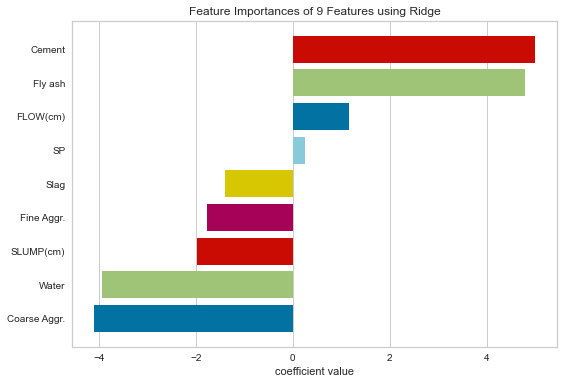

In [106]:
#pipe üzerinden bakamadıgımız için aşagıdaki yöntemleri elle yapıyoruz...
from yellowbrick.model_selection import FeatureImportances 

model = Ridge(alpha=pipe_ridgecv["ridgecv"].alpha_)  # ridge_cv_model.alpha_ = 0.91
viz = FeatureImportances(model,labels=list(X.columns), relative=False)#relative=False yazınca verdiği değerler katsayı değerleri oluyor..
viz.fit(X_train_scaled,y_train)
viz.show();



## Feature importances with Lasso

In [107]:
pipe_lassocv["lassocv"].alpha_

0.1

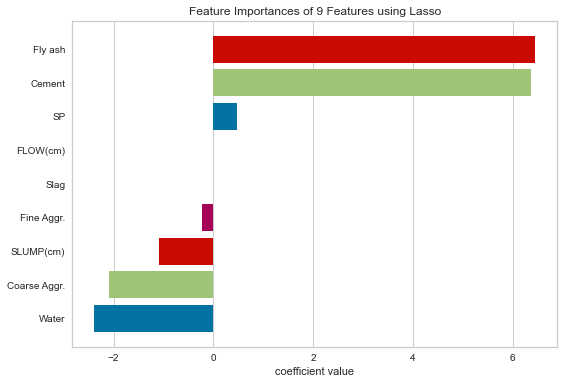

In [109]:
from yellowbrick.model_selection import FeatureImportances

model = Lasso(alpha=pipe_lassocv["lassocv"].alpha_)  # lasso_cv_model.alpha_ = 0.1
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show();

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___